In [8]:
!wget 'https://sfi-essential.s3.eu-west-1.amazonaws.com/gurobi11.0.0_linux64.tar.gz'
!wget 'https://sfi-essential.s3.eu-west-1.amazonaws.com/DCC.net.xml'

--2024-01-25 13:30:30--  https://sfi-essential.s3.eu-west-1.amazonaws.com/gurobi11.0.0_linux64.tar.gz
Resolving sfi-essential.s3.eu-west-1.amazonaws.com (sfi-essential.s3.eu-west-1.amazonaws.com)... 52.218.117.34, 52.218.100.216, 52.218.120.226, ...
Connecting to sfi-essential.s3.eu-west-1.amazonaws.com (sfi-essential.s3.eu-west-1.amazonaws.com)|52.218.117.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70145211 (67M) [application/x-gzip]
Saving to: ‘gurobi11.0.0_linux64.tar.gz.1’

gurobi11.0.0_linux6 100%[===================>]  66.90M  4.94MB/s    in 13s     

2024-01-25 13:30:44 (5.00 MB/s) - ‘gurobi11.0.0_linux64.tar.gz.1’ saved [70145211/70145211]

--2024-01-25 13:30:44--  https://sfi-essential.s3.eu-west-1.amazonaws.com/DCC.net.xml
Resolving sfi-essential.s3.eu-west-1.amazonaws.com (sfi-essential.s3.eu-west-1.amazonaws.com)... 52.218.117.34, 52.218.100.216, 52.218.120.226, ...
Connecting to sfi-essential.s3.eu-west-1.amazonaws.com (sfi-essential.s3.eu-

In [2]:
!pip install pulp

In [1]:
!tar xvfz gurobi11.0.0_linux64.tar.gz

import os

# Set the GUROBI_HOME environment variable

os.environ['GUROBI_HOME'] = "optimization/gurobi1100/linux64"

# Update the PATH environment variable
os.environ['PATH'] = f"{os.environ['PATH']}:{os.environ['GUROBI_HOME']}/bin"

os.environ['GRB_LICENSE_FILE'] = '/Users/yue/Documents/gurobi.lic'

# Set the LD_LIBRARY_PATH environment variable
os.environ['LD_LIBRARY_PATH'] = f"{os.environ['GUROBI_HOME']}/lib"

x gurobi1100/
x gurobi1100/linux64/
x gurobi1100/linux64/lib/
x gurobi1100/linux64/lib/gurobi.jar
x gurobi1100/linux64/lib/gurobi-javadoc.jar
x gurobi1100/linux64/lib/gurobi110.netstandard20.dll
x gurobi1100/linux64/lib/gurobi110.netstandard20.xml
x gurobi1100/linux64/lib/libgurobi.so.11.0.0
x gurobi1100/linux64/lib/libgurobi110_light.so
x gurobi1100/linux64/lib/libGurobiJni110.so
x gurobi1100/linux64/lib/libgurobi_g++8.5.a
x gurobi1100/linux64/lib/rootcert.pem
x gurobi1100/linux64/lib/python3.11/
x gurobi1100/linux64/lib/python3.11/gurobipy/
x gurobi1100/linux64/lib/python3.11/gurobipy/__init__.py
x gurobi1100/linux64/lib/python3.11/gurobipy/gurobipy.so
x gurobi1100/linux64/lib/python3.11/encodings/
x gurobi1100/linux64/lib/python3.11/encodings/aliases.py
x gurobi1100/linux64/lib/python3.11/encodings/ascii.py
x gurobi1100/linux64/lib/python3.11/encodings/base64_codec.py
x gurobi1100/linux64/lib/python3.11/encodings/big5hkscs.py
x gurobi1100/linux64/lib/python3.11/encodings/big5.py
x g

In [1]:
import pulp
#print(pulp.listSolvers())

print(pulp.listSolvers(onlyAvailable = True))

['GUROBI_CMD', 'PULP_CBC_CMD']


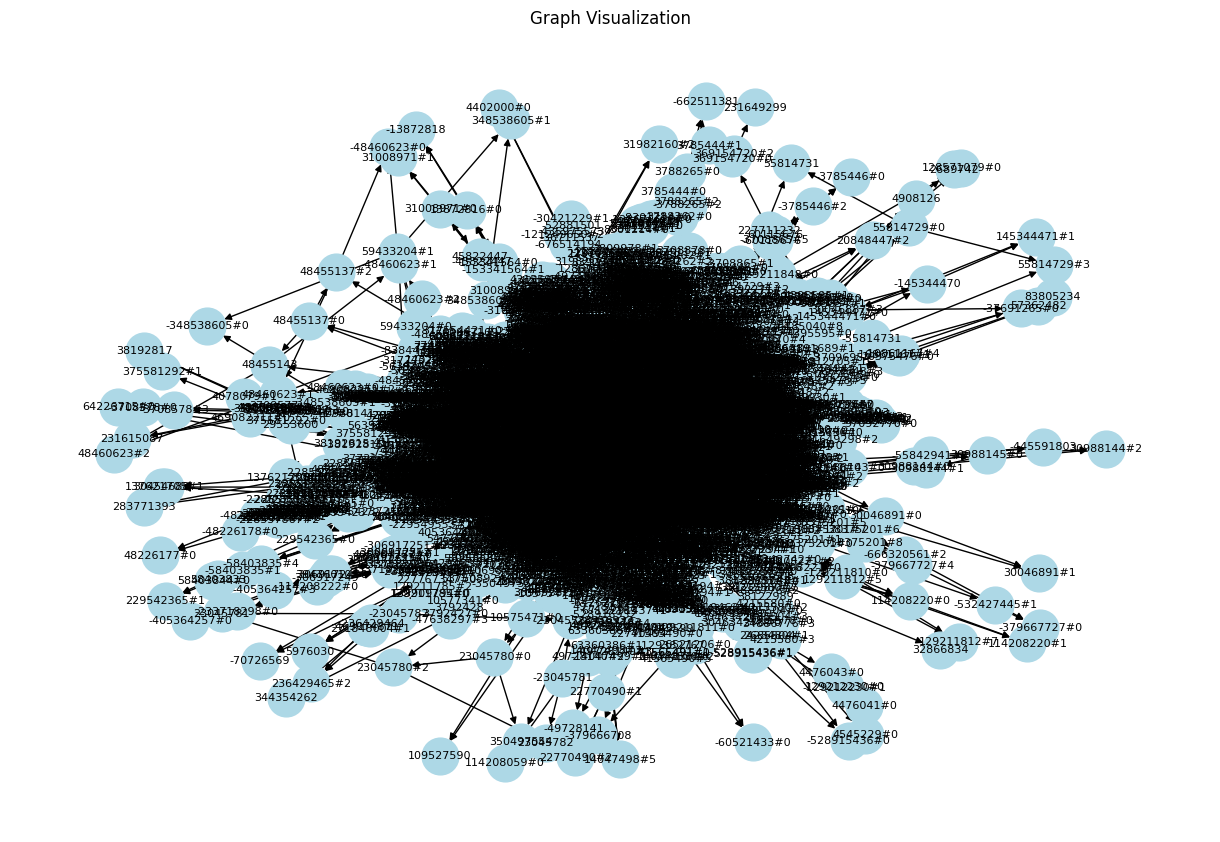

The graph is not strongly connected.
A path exists between 3789374#3 and 41592115.


In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# create a directed graph
def create_graph_from_net_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    G = nx.DiGraph()

    for connection in root.findall('.//connection'):
        from_node = connection.get('from')
        to_node = connection.get('to')

        # Function to check if a node starts with a number or negative sign
        def is_numeric_node(node):
            return node.startswith('-') or node[0].isdigit()

        # Exclude nodes that do not start with a number or negative sign
        if is_numeric_node(from_node) and is_numeric_node(to_node):
            G.add_edge(from_node, to_node)

    return G

# visualize the graph
def visualize_graph(G):
    plt.figure(figsize=(12, 8))  # Set the figure size for the plot
    nx.draw(G, with_labels=True, node_size=700, node_color="lightblue", font_size=8)
    plt.title("Graph Visualization")
    plt.show()

# Check if the graph is strongly connected
def check_strongly_connected(G):
    return nx.is_strongly_connected(G)

# Main execution
file_path = "DCC.net.xml"  # use DCC as an example here
graph = create_graph_from_net_xml(file_path)

# Display basic information
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
(num_nodes, num_edges)

is_connected = check_strongly_connected(graph)
visualize_graph(graph)

print(f"The graph is {'strongly connected' if is_connected else 'not strongly connected'}.")


# remapping the IDs
import networkx as nx
import xml.etree.ElementTree as ET

# Function to parse the .net.xml file and create a directed graph
def create_graph_from_net_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    G = nx.DiGraph()

    for connection in root.findall('.//connection'):
        from_node = connection.get('from')
        to_node = connection.get('to')

        # Check if a node starts with a number or negative sign
        def is_numeric_node(node):
            return node.startswith('-') or node[0].isdigit()

        # Exclude nodes that do not start with a number or negative sign
        if is_numeric_node(from_node) and is_numeric_node(to_node):
            G.add_edge(from_node, to_node)

    return G

# Function to relabel the nodes of the graph starting from 1
def relabel_graph_nodes(G):
    mapping = {node: new_name for new_name, node in enumerate(G.nodes(), start=1)}
    G_renamed = nx.relabel_nodes(G, mapping)
    return G_renamed

# Function to create a node mapping from old IDs to new IDs starting from 1
def create_node_mapping(G):
    mapping = {node: new_name for new_name, node in enumerate(G.nodes(), start=1)}
    return mapping

# Path to your .net.xml file
file_path = "DCC.net.xml"

# Create and relabel the graph
graph = create_graph_from_net_xml(file_path)
graph_renamed = relabel_graph_nodes(graph)

# Generate the node mapping
node_mapping = create_node_mapping(graph)

# Displaying the changed mappings

#for old_id, new_id in list(node_mapping.items()):
#    print(f"Old ID {old_id} maps to New ID {new_id}")


# for directed graph

import pulp
import random
import networkx as nx
import matplotlib.pyplot as plt

G = graph_renamed

# Number of nodes and station types
station_types = ['eb', 'es', 'ec', 'walk']

# Define node stations: all nodes have all station types
node_stations = {i: station_types for i in range(1, num_nodes + 1)}

# Probability of a node having no preferred station type (as a percentage)
no_preference_probability = 50  # Example: 30%

# Define preferred station types for each node
preferred_station = {}
for i in range(1, num_nodes + 1):
    if random.randint(1, 100) <= no_preference_probability:
        # With no_preference_probability chance, set no preference ['']
        preferred_station[i] = ['']
    else:
        # Otherwise, randomly decide the number of preferred types
        num_preferred = random.randint(1, len(station_types) - 1)  # Exclude 'walk' only option
        preferred_types = [st for st in station_types if st != 'walk']
        preferred_station[i] = random.sample(preferred_types, num_preferred)
        # Ensure 'walk' is included if any of 'ec', 'eb', or 'es' are present
        if 'walk' not in preferred_station[i]:
            preferred_station[i].append('walk')


# Define station change costs
M = 1e6  # Large cost for prohibitive changes

# costs for each transportation mode
costs_walk_range = (50, 100)  # Highest cost for walking
costs_es_range = (20, 40)    # Next highest for electric scooter
costs_eb_range = (10, 20)      # Lower for electric bike
costs_ec_range = (1, 5)      # Lowest for electric car

costs = {}
for i, j in G.edges():
    for s in set(node_stations[i]).intersection(node_stations[j]):
        if s == 'walk':
            costs[i, j, s] = random.randint(*costs_walk_range)
        elif s == 'es':
            costs[i, j, s] = random.randint(*costs_es_range)
        elif s == 'eb':
            costs[i, j, s] = random.randint(*costs_eb_range)
        elif s == 'ec':
            costs[i, j, s] = random.randint(*costs_ec_range)


station_changes = {(i, s1, s2): pulp.LpVariable(f"station_change_{i}_{s1}_{s2}", 0, 1, pulp.LpBinary)
                   for i in range(1, num_nodes + 1)
                   for s1 in preferred_station[i]
                   for s2 in preferred_station[i] if s1 != s2}

station_change_costs = {}
for i in range(1, num_nodes + 1):
  if len(preferred_station[i]) > 1:
    for s1 in preferred_station[i]:
        for s2 in preferred_station[i]:
            if s1 != s2:
              station_change_costs[i, s1, s2] = 0.1
            else:
              # High cost for non-preferred changes
              station_change_costs[i, s1, s2] = M


# Initialize state of charge (SoC) for e-mobility tools at each node based on preferred station types
initial_soc = {}
for i in range(1, num_nodes + 1):
    initial_soc[i] = {}
    for tool in ['es', 'ec', 'eb']:
        if tool in preferred_station[i] and tool == 'es':
            initial_soc[i][tool] = random.randint(20, 100) # change it here for different energy distribution.
        if tool in preferred_station[i] and tool == 'ec':
            initial_soc[i][tool] = random.randint(20, 100)
        if tool in preferred_station[i] and tool == 'eb':
            initial_soc[i][tool] = random.randint(20, 100)


# # Energy consumption rates for each road segment w.r.t each e-mode
energy_consumption = {'es': {edge: random.uniform(3, 4) for edge in G.edges},
                      'ec': {edge: random.uniform(5, 6) for edge in G.edges},
                      'eb': {edge: random.uniform(1, 2) for edge in G.edges}}


# check if there's a feasible path between starting point A and destination point B, if so, proceed to the next optimization step

def check_path_existence(G, node_start, node_end):
    return nx.has_path(G, node_start, node_end)

# Example
old_start_id = '3789374#3'
old_end_id = '41592115'
#old_end_id = '6273612#1'

node_start = node_mapping[old_start_id]
node_end = node_mapping[old_end_id]

# Check if a path exists between node_start and node_end
path_exists = check_path_existence(G, node_start, node_end)

print(f"A path {'exists' if path_exists else 'does not exist'} between {old_start_id} and {old_end_id}.")


In [30]:
from sys import modules
# New Optimization starts here.

# Specify start and end conditions
start_node, start_station = node_start, 'walk'
end_node, end_station = node_end, 'walk'

max_station_changes = 5  # Example: maximum 20 station changes allowed

# Create a MILP problem
prob = pulp.LpProblem("Minimize_Traversal_Cost", pulp.LpMinimize)

# Decision variables for paths between different nodes and station changes
paths = {(i, j, s): pulp.LpVariable(f"path_{i}_{j}_{s}", 0, 1, pulp.LpBinary)
         for i, j in G.edges()
         for s in set(node_stations[i]).intersection(node_stations[j])}

# Objective Function
#prob += pulp.lpSum([paths[i, j, s] * costs[i, j, s] for i, j, s in paths]) + pulp.lpSum([paths[i, j, s] * 3 * energy_consumption[s].get((i,j), 0) for i, j, s in paths]) + \
#        pulp.lpSum([station_changes[i, s1, s2] * station_change_costs[i, s1, s2] for i, s1, s2 in station_changes])


prob += pulp.lpSum([paths[i, j, s] * costs[i, j, s] for i, j, s in paths]) + \
        pulp.lpSum([station_changes[i, s1, s2] * station_change_costs[i, s1, s2] for i, s1, s2 in station_changes])


# Add flow conservation, max station changes, etc.

for i in range(1, num_nodes + 1):
    for s in station_types:
        if s in node_stations[i]:
            incoming_flow = pulp.lpSum([paths[j, i, s] for j in G.predecessors(i) if (j, i, s) in paths])
            outgoing_flow = pulp.lpSum([paths[i, j, s] for j in G.successors(i) if (i, j, s) in paths])

            incoming_station_changes = pulp.lpSum([station_changes[i, s2, s] for s2 in node_stations[i] if (i, s2, s) in station_changes])
            outgoing_station_changes = pulp.lpSum([station_changes[i, s, s2] for s2 in node_stations[i] if (i, s, s2) in station_changes])

            incoming_flow += incoming_station_changes
            outgoing_flow += outgoing_station_changes

            if i == start_node and s == start_station:
                prob += outgoing_flow == 1
                prob += incoming_flow == 0
            elif i == end_node and s == end_station:
                prob += incoming_flow == 1
                prob += outgoing_flow == 0
            else:
                prob += incoming_flow == outgoing_flow


def find_minimum_values(initial_soc):
    # Initialize minimum values with a very high number
    min_values = {'es': float('inf'), 'ec': float('inf'), 'eb': float('inf')}

    # Iterate through each node
    for node in initial_soc:
        # Iterate through each tool in the node
        for tool in initial_soc[node]:
            # Update the minimum value if a lower value is found
            if initial_soc[node][tool] < min_values[tool]:
                min_values[tool] = initial_soc[node][tool]

    return min_values


def find_maximum_values(initial_soc):
    # Initialize maximum values with a very low number
    max_values = {'es': float('-inf'), 'ec': float('-inf'), 'eb': float('-inf')}

    # Iterate through each node
    for node in initial_soc:
        # Iterate through each tool in the node
        for tool in initial_soc[node]:
            # Update the maximum value if a higher value is found
            if initial_soc[node][tool] > max_values[tool]:
                max_values[tool] = initial_soc[node][tool]

    return max_values

def find_expected_values(initial_soc):
    # Initialize sums and counts
    sum_values = {'es': 0, 'ec': 0, 'eb': 0}
    count_values = {'es': 0, 'ec': 0, 'eb': 0}

    # Iterate through each node
    for node in initial_soc:
        # Iterate through each tool in the node
        for tool in initial_soc[node]:
            sum_values[tool] += initial_soc[node][tool]
            count_values[tool] += 1

    # Calculate average (expected) values
    expected_values = {}
    for tool in sum_values:
        if count_values[tool] > 0:
            expected_values[tool] = sum_values[tool] / count_values[tool]
        else:
            expected_values[tool] = None  # or some default value if no data is present for the tool

    return expected_values


#soc_values = find_maximum_values(initial_soc) # try first
soc_values = find_expected_values(initial_soc) # try second
#soc_values = find_minimum_values(initial_soc) # last try

EB_value = soc_values['eb']
EC_value = soc_values['ec']
ES_value = soc_values['es']


# Printing the minimum values
print("e-bike soc value:", EB_value)
print("e-car soc value:", EC_value)
print("e-scooter soc value:", ES_value)
print('\n')

# Constraint for maximum number of station changes
prob += pulp.lpSum(station_changes.values()) <= max_station_changes, "MaxStationChanges"

prob += pulp.lpSum([paths[i, j, s] * energy_consumption[s].get((i, j), 0)
                    for i, j, s in paths if s == 'eb']) <= EB_value, "ebconstraint"

prob += pulp.lpSum([paths[i, j, s] * energy_consumption[s].get((i, j), 0)
                    for i, j, s in paths if s == 'ec']) <= EC_value, "ecconstraint"

prob += pulp.lpSum([paths[i, j, s] * energy_consumption[s].get((i, j), 0)
                    for i, j, s in paths if s == 'es']) <= ES_value, "esconstraint"


import time

# Solve the problem
start_time = time.time()
prob.solve(pulp.GUROBI_CMD(msg=True))
end_time = time.time()
print("Execution time: {:.2f} seconds".format(end_time - start_time))


def get_old_id_for_new(node_mapping, new_id):
    # Reverse the mapping: new IDs as keys, old IDs as values
    reversed_mapping = {new: old for old, new in node_mapping.items()}

    # Look up the new ID in the reversed mapping
    return reversed_mapping.get(new_id, None)  # Returns None if new_id is not found


# Output results
if pulp.LpStatus[prob.status] == 'Optimal':
    print("Total Cost: ", pulp.value(prob.objective))

    # Start from the initial node and mode
    current_node, current_mode = start_node, start_station

    # Initialize a list to store the path sequence with costs
    path_sequence = []

    path_sequence_new = []

    # Initialize a counter for the number of station changes
    station_change_count = 0

    # Track whether the destination has been reached
    destination_reached = False

    # Iterate until the destination is reached
    while not destination_reached:
        # Find the next step in the path
        next_step_found = False
        for i, j, s in paths:
            if i == current_node and s == current_mode and pulp.value(paths[i, j, s]) == 1:
                # Add the current step and its cost to the path sequence
                path_cost = costs[i, j, s]
                path_sequence.append((get_old_id_for_new(node_mapping, i), get_old_id_for_new(node_mapping, j), s, path_cost))
                path_sequence_new.append((i, j, s, path_cost))
                current_node = j
                next_step_found = True
                break

        # Check if mode change occurs at the current node
        for i, s1, s2 in station_changes:
            if i == current_node and s1 == current_mode and pulp.value(station_changes[i, s1, s2]) == 1:
                # Add the mode change and its cost to the path sequence
                mode_change_cost = station_change_costs[i, s1, s2]
                path_sequence.append((get_old_id_for_new(node_mapping, i), s1, s2, mode_change_cost))
                path_sequence_new.append((i, s1, s2, mode_change_cost))
                current_mode = s2
                station_change_count += 1
                next_step_found = True

        # Check if the destination is reached
        if current_node == end_node and current_mode == end_station:
            destination_reached = True
        elif not next_step_found:
            print("Destination not reached. Path may be incomplete.")
            break

    # Print the path sequence with costs and the number of station changes
    print("Optimal Path Sequence with Costs:", path_sequence)
    print("Mapped Optimal Path Sequence with Costs:", path_sequence_new)
    print("Total Number of Station Changes:", station_change_count)

else:
    print("No optimal solution found.")



def display_mode_segments_and_energy(path_sequence, modes, energy_consumption, initial_soc, node_mapping):
    # Dictionary to hold data for all segments of each mode
    segments_by_mode = {mode: [] for mode in modes}

    # Temporary storage for the current segment data
    current_segment_data = None

    is_energy_sufficient = 1

    for segment in path_sequence:
        start_node, end_node, mode, _ = segment

        # If we encounter a mode change, we reset the current segment data
        if current_segment_data and mode != current_segment_data['mode']:
            segments_by_mode[current_segment_data['mode']].append(current_segment_data)
            current_segment_data = None

        # Initialize segment data for the new mode if it does not exist
        if mode in modes and current_segment_data is None:
            current_segment_data = {
                'start_node': start_node,
                'end_node': end_node,
                'mode': mode,
                'energy_consumed': 0.0,
                'detailed_path': []
            }

        # If the current segment is continuing the same mode, update the end node and energy consumption
        elif mode in modes and current_segment_data['mode'] == mode:
            current_segment_data['end_node'] = end_node
            edge = (start_node, end_node)
            energy_for_edge = energy_consumption[mode].get(edge, 0)
            current_segment_data['energy_consumed'] += energy_for_edge

            # Record segment details
            if energy_for_edge > 0:
                segment_detail = f"{get_old_id_for_new(node_mapping, start_node)} -> {get_old_id_for_new(node_mapping, end_node)} ({mode}): Energy consumed = {energy_for_edge:.2f}"
                # print(segment_detail)
                current_segment_data['detailed_path'].append(segment_detail)
            # print("-------------------------")
            # print(current_segment_data)
            # print("-------------------------")
    
    # Check for any remaining segment data when loop finishes
    if current_segment_data:
        segments_by_mode[current_segment_data['mode']].append(current_segment_data)
    # print("-------------------------")
    # print(segments_by_mode)
    # print("-------------------------")
    # Now, display the information for each mode
    for mode, segments in segments_by_mode.items():
        for segment in segments:
            my_k = display_segment_info(mode, segment, initial_soc, node_mapping)
            is_energy_sufficient = is_energy_sufficient * my_k
    print('\n')
    return is_energy_sufficient

def display_segment_info(mode, segment, initial_soc, node_mapping):
    
    # ANSI escape code for bold text
    ANSI_BOLD = "\033[1m"
    ANSI_RESET = "\033[0m"

    k = 1

    print(f"{ANSI_BOLD}\nPath for vehicle '{mode}':{ANSI_RESET}")
    start_node_id = get_old_id_for_new(node_mapping, segment['start_node'])
    end_node_id = get_old_id_for_new(node_mapping, segment['end_node'])
    print(f"  Start node: {start_node_id}")
    print(f"  End node: {end_node_id}")
    initial_soc_value = initial_soc.get(segment['start_node'], {}).get(mode, 0)
    print(f"  Initial SoC at Start node: {initial_soc_value}%")
    print(f"  Total energy consumed for this path: {segment['energy_consumed']:.2f}%\n")
    print("Details of the path:")

    for seg_detail in segment['detailed_path']:
        print("  " + seg_detail)
      
        if initial_soc_value >= segment['energy_consumed']:
            k = 1
        else:
            k = 0
    return k


# Example usage
modes = ['eb','ec','es']
energy_enough = display_mode_segments_and_energy(path_sequence_new, modes, energy_consumption, initial_soc, node_mapping)


# Print whether energy is enough or not
if energy_enough == 1:
    print("Energy is enough.")
else:
    print("Energy is not enough.")


e-bike soc value: 59.95056689342404
e-car soc value: 60.66243769823289
e-scooter soc value: 59.795495495495494

Set parameter Username
Set parameter LogFile to value "gurobi.log"
Using license file /Users/yue/gurobi.lic
Academic license - for non-commercial use only - expires 2025-01-15

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 22.6.0 22G74)
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/97/v7fkhdtx3xl0zcrx4qtv9s0h0000gn/T/a2b23d7776824f6cb3db8e553189608a-pulp.lp
Reading time = 0.10 seconds
OBJ: 26390 rows, 71592 columns, 202416 nonzeros

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 26390 rows, 71592 columns and 202416 nonzeros
Model fingerprint: 0x0bef8d02
Variable types: 0 continuous, 71592 integer (71592 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e-01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  R